##Preparacion del ambiente

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yp
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import requests
from IPython.display import clear_output
import time

global_df_bitcoin,
precio_actual, 
tendencia, 
media_bitcoin,  
algoritmo_decision

In [2]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

##Obtencion de datos

Crea una funcion importar_base_bitcoin(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.
Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

Importar Base Bitcoin


In [3]:
def importar_base_bitcoin():
  btc = yp.Ticker("BTC-USD")
  global df_bitcoin
  df_bitcoin = btc.history(period = "7d", interval = "5m")
  


Extraccion de datos - Valor actual y variacion

In [4]:
def extraer_tendencia():
  url = "https://coinmarketcap.com/"
  headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"}
  response = requests.get(url, headers = headers)
  soup = BeautifulSoup(response.content, features = "lxml")

  #Obtener ranking en el que esta Bitcoin
  posicion = soup.findAll("p", {"class":"sc-4984dd93-0 kKpPOn"})
  for i in range(len(posicion)):
    if posicion[i].getText() == "Bitcoin":
      btc_posicion = i

  #Obtencion del precio actual
  global precio_actual
  precio_actual_str = soup.find_all("div", {"class":["sc-cadad039-0 clgqXO", "sc-cadad039-0 clgqXO fall", "sc-cadad039-0 clgqXO rise"]})[btc_posicion].getText()
  precio_actual = float(precio_actual_str[1:].replace(",", ""))

  #Obtencion de 1h %
  #variacion_numerica = float(soup.find_all("span", {"class":["sc-97d6d2ca-0 bQjSqS", "sc-97d6d2ca-0 cYiHal"]})[btc_posicion].getText()[:-1])
  
  #Obtener tendencia de Alta o Baja
  variacion = soup.find_all("span", {"class":["sc-97d6d2ca-0 bQjSqS", "sc-97d6d2ca-0 cYiHal"]})[btc_posicion]

  global tendencia
  tag = variacion.find("span", {"class": "icon-Caret-up"})
  if tag is not None:
    tendencia = "Alta"
  else:
    tendencia = "Baja"

  #return precio_actual, tendencia

In [5]:
importar_base_bitcoin()

In [6]:
extraer_tendencia()

In [7]:
print(f"El precio actual del Bitcoin es: {precio_actual}, y esta con una tendencia de {tendencia}")

El precio actual del Bitcoin es: 27264.19, y esta con una tendencia de Baja


##Limpieza de Datos

Crea una funcion limpieza_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Antes de limpiar la base, crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido:

Datetime: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

Open: Contiene el precio del Bitcoin al inicio del intervalo.

High: Contiene el precio más alto del Bitcoin durante el intervalo.

Low: Contiene el precio más bajo del Bitcoin durante el intervalo.

Close: Contiene el precio del Bitcoin al final del intervalo.

Volume: Contiene el total de transacciones hechas durante el intervalo.

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

Analiza la base df_bitcoin_limpio, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.
Luego busca por valores nulos en la columna Close y trátalos.
Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.
Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.
Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.
Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.

In [8]:
df_bitcoin_limpio = df_bitcoin[["Close", "Volume"]].copy()

Visualizacion de algunos datos

In [9]:
df_bitcoin_limpio.sample(5)

,Close,Volume
Datetime,,
2023-05-10 12:10:00+00:00,27685.671875,831488
2023-05-13 03:10:00+00:00,26813.265625,0
2023-05-13 17:55:00+00:00,26825.986328,0
2023-05-15 04:25:00+00:00,27219.302734,28129280
2023-05-13 23:15:00+00:00,26929.808594,0


Visualizacion de tipo de datos, cantidad y nulos

In [10]:
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2023-05-10 00:00:00+00:00 to 2023-05-15 13:05:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1598 non-null   float64
 1   Volume  1598 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 37.5 KB


Visualizando valores unicos del Index

In [11]:
valores_unicos_index_btc = df_bitcoin_limpio.index.nunique()
print(f"Valores totales {len(df_bitcoin_limpio)} - {valores_unicos_index_btc} valores unicos del index")

Valores totales 1598 - 1598 valores unicos del index


Grafico de Boxblot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: >

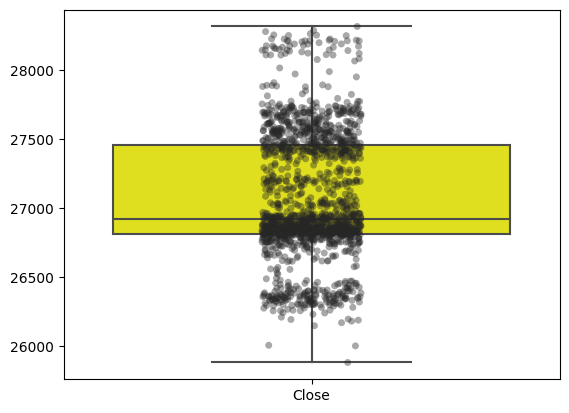

In [12]:
sns.boxplot(data= df_bitcoin_limpio[["Close"]], color="yellow")
sns.stripplot(data=df_bitcoin_limpio[["Close"]], color ="black", alpha= 0.4)

In [13]:
def limpieza_datos():
  #Eliminando columnas con valor 0
  global df_bitcoin_limpio

  #Buscar duplicados en el index y quedarse con index unicos
  df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep="first")]

  #Buscar nulos de Close y tratalos
  df_bitcoin_limpio.Close.fillna(0, inplace = True)

  #buscar valores iguales o menor a 0 en Volume y eliminarlos
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.Volume > 0]

  #Identificacion y eliminacion de outlier en Close
  q1, q3 = df_bitcoin_limpio["Close"].quantile([0.25, 0.75])
  iiq = q3 - q1 
  out_inf = q1 - 1.5 * iiq
  out_sup= q3 + 1.5 * iiq

  df_bitcoin_limpio = df_bitcoin_limpio.query(f"Close > {out_inf}" and f"Close < {out_sup}")

  #Seleccion de los valores Close que se encuentren entre el 1° y 3° quartile
  Close = df_bitcoin_limpio.query(f"Close > {q1}" and f"Close < {q3}")["Close"]

  #Calcular el precio promedio de Close (guadar en media_bitcoin)
  global media_bitcoin
  media_bitcoin = Close.mean()

In [14]:
limpieza_datos()

In [15]:
media_bitcoin

26927.099250911237

##Tomar decision


Llegó el momento de construir tu algoritmo de decisión:

Crea una funcion tomar_decisiones(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.

In [16]:
def tomar_decisiones():
  global media_bitcoin, tendencia, precio_actual, algoritmo_decision
  if precio_actual >= media_bitcoin and tendencia == "Baja":
    algoritmo_decision = "Vender"
  elif precio_actual < media_bitcoin and tendencia == "Alta":
    algoritmo_decision = "Comprar"
  else:
    algoritmo_decision = ""

In [17]:
tomar_decisiones()

In [18]:
algoritmo_decision

'Vender'

##Visualizacion


Crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable media_bitcoin.
Configura el tamaño del gráfico en una proporción de 16x5.
Adiciona un título al gráfico.
Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin.
Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin.
Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.
Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.

In [53]:
def visualizar():
  global media_bitcoin, df_bitcoin, promedio, algoritmo_decision
  df_bitcoin["Promedio"] = media_bitcoin

  fig, ax = plt.subplots()
  fig.set_size_inches(16,5)
  ax.set_title("Tendencia del Bitcoin ultimos 7 dias", fontsize=20)
  plt.plot(df_bitcoin.index, df_bitcoin.Close)
  plt.plot(df_bitcoin.Promedio)
  plt.annotate(algoritmo_decision, xy = (1, 1),fontsize = 10)

  posicion_x_px = 50
  posicion_y_px = 260
  texto = algoritmo_decision

  # Obtener el tamaño de la figura en píxeles
  fig_size_px = plt.gcf().get_size_inches() * plt.gcf().dpi

  # Convertir coordenadas de píxeles a coordenadas del gráfico
  posicion_x = posicion_x_px / fig_size_px[0]
  posicion_y = 1 - (posicion_y_px / fig_size_px[1])  # Invertir el eje y

  # Agregar el texto en la posición especificada
  plt.text(posicion_x, posicion_y, texto, fontsize=12, transform=plt.gca().transAxes)

  fig.show()


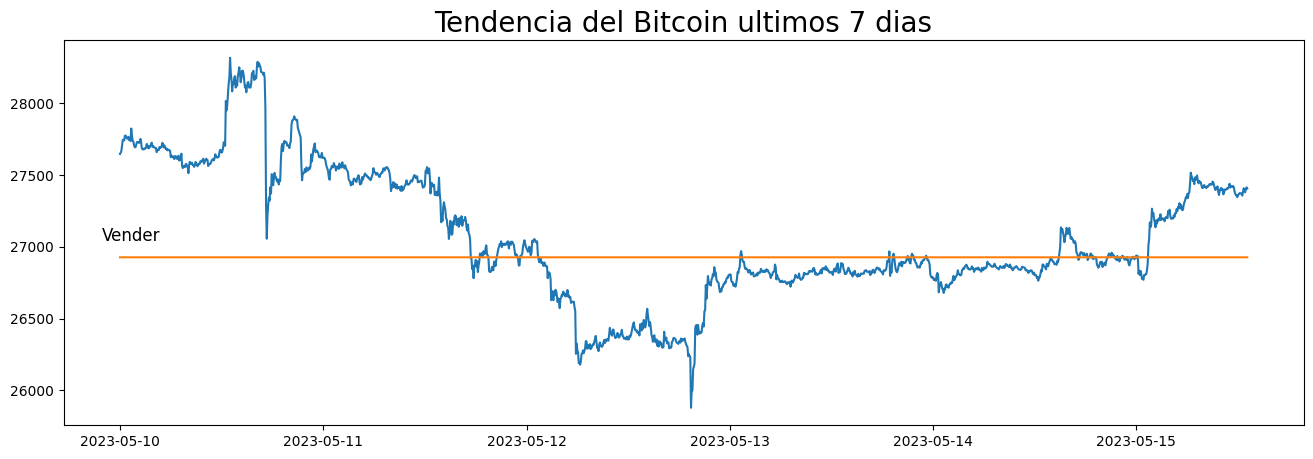

In [64]:
visualizar()

##Automatizacion


KeyboardInterrupt: ignored

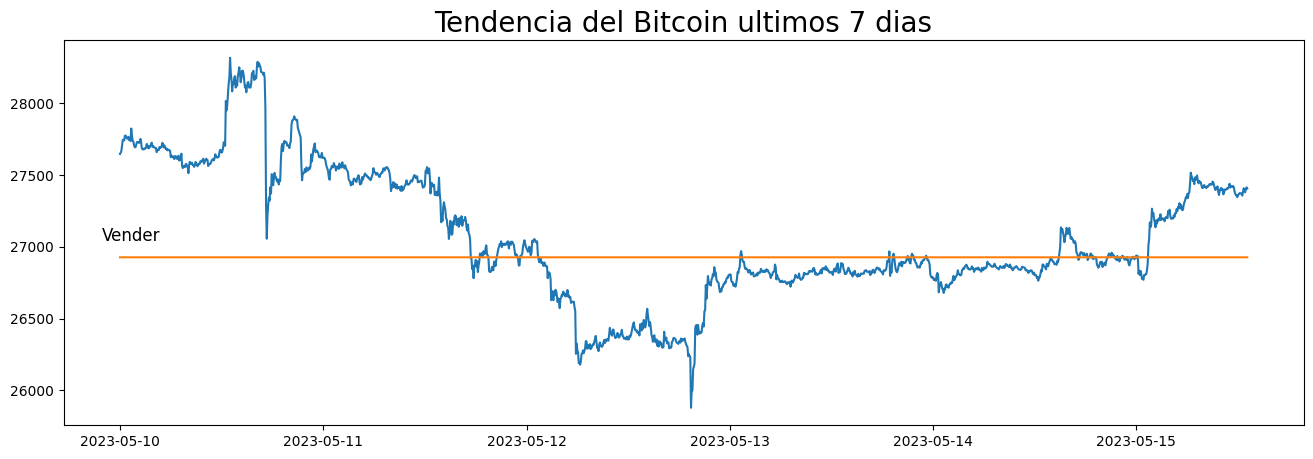

In [65]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencia()
  limpieza_datos()
  tomar_decisiones()
  visualizar()
  time.sleep(300)